# Exploratory Data Analysis of AirBnB Listings in London, England
## Part 1 - Initial Data Understanding
#### This section will show relevant information regarding single variables of the dataset and their behavior, which will help in choosing the most relevant to the final conclusions and analyzing relationships between them.

## Initial setup
### Run this section first to ensure the correct functionality of the rest of the script.

First, import the required libraries and set the maximum display of data tables

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from matplotlib.ticker import PercentFormatter

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)


Then, import the corresponding datasets

In [32]:
lsts_url = "./data/listings.csv.gz"
revs_url = "./data/reviews.csv.gz"

lsts_df = pd.read_csv(lsts_url)
revs_df = pd.read_csv(revs_url)


### 1.1 Neighbourhoods
To begin with, we list each of the unique neighbourhoods in the database

In [33]:
nh_lst = lsts_df["neighbourhood_cleansed"].unique()
print(nh_lst)

['Westminster' 'Hammersmith and Fulham' 'Islington'
 'Kensington and Chelsea' 'Hackney' 'Lambeth' 'Barking and Dagenham'
 'Southwark' 'Wandsworth' 'Barnet' 'Camden' 'Hillingdon' 'Tower Hamlets'
 'Richmond upon Thames' 'Haringey' 'Greenwich' 'Merton' 'Brent' 'Newham'
 'Hounslow' 'Croydon' 'Waltham Forest' 'Lewisham' 'Enfield'
 'City of London' 'Ealing' 'Bromley' 'Havering' 'Harrow'
 'Kingston upon Thames' 'Redbridge' 'Bexley' 'Sutton']


Then, we organize the neighbourhoods by number of listings available in each one. This will help in performing a Pareto analysis to select the neighbourhoods that represent approximately 80% of listings:

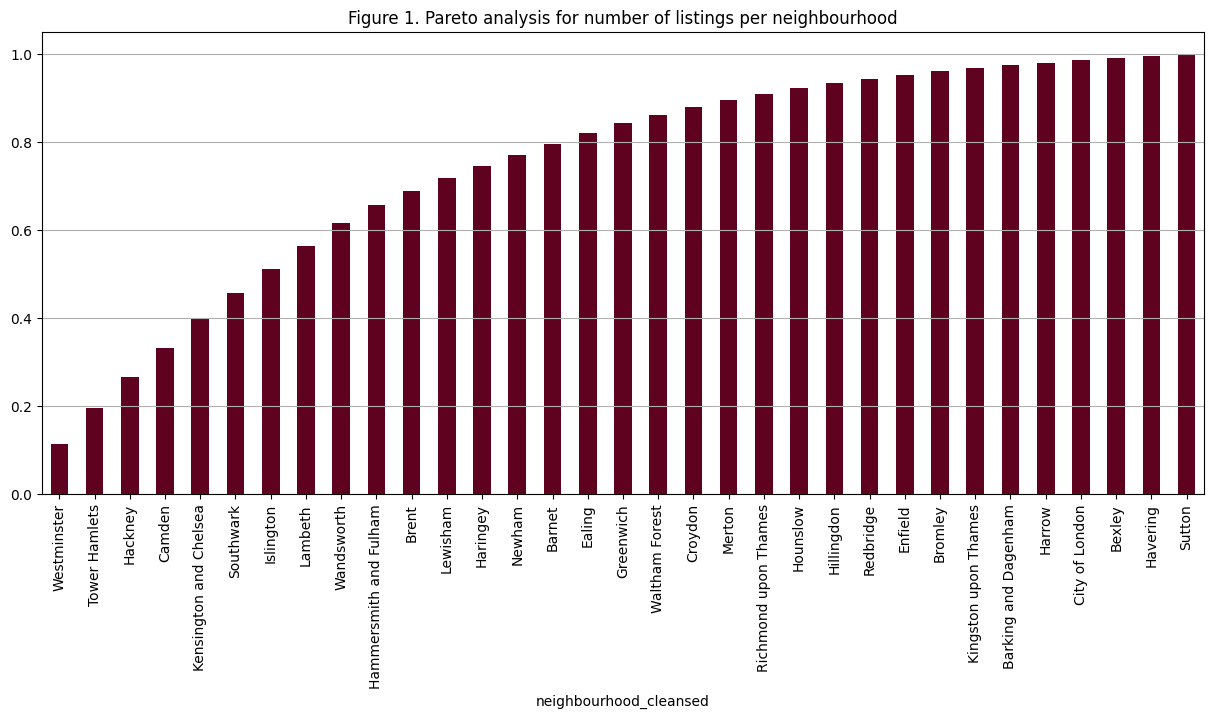

In [34]:
nh_ct = []                                                                                  #Vector for count of listings in each neighbourhood

nh_cfreq = lsts_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

plt.figure(figsize=(15,6))
#plt.bar(lsts_df["neighbourhood_cleansed"].unique(),lsts_df["neighbourhood_cleansed"].value_counts(), color='#5f021f')
nh_cfreq.plot(kind='bar',color='#5f021f')
plt.xticks(rotation=90)

plt.title("Figure 1. Pareto analysis for number of listings per neighbourhood")
plt.grid(axis='y')
plt.show()

nh_rep = nh_cfreq.loc[nh_cfreq < 0.8].index.tolist()                                #Define a vector with the most relevant neighbourhood for future use
nh_nrep = nh_cfreq.loc[nh_cfreq >= 0.8].index.tolist()

Lastly, we will map the most representative neighbourhoods by their coordinates. 

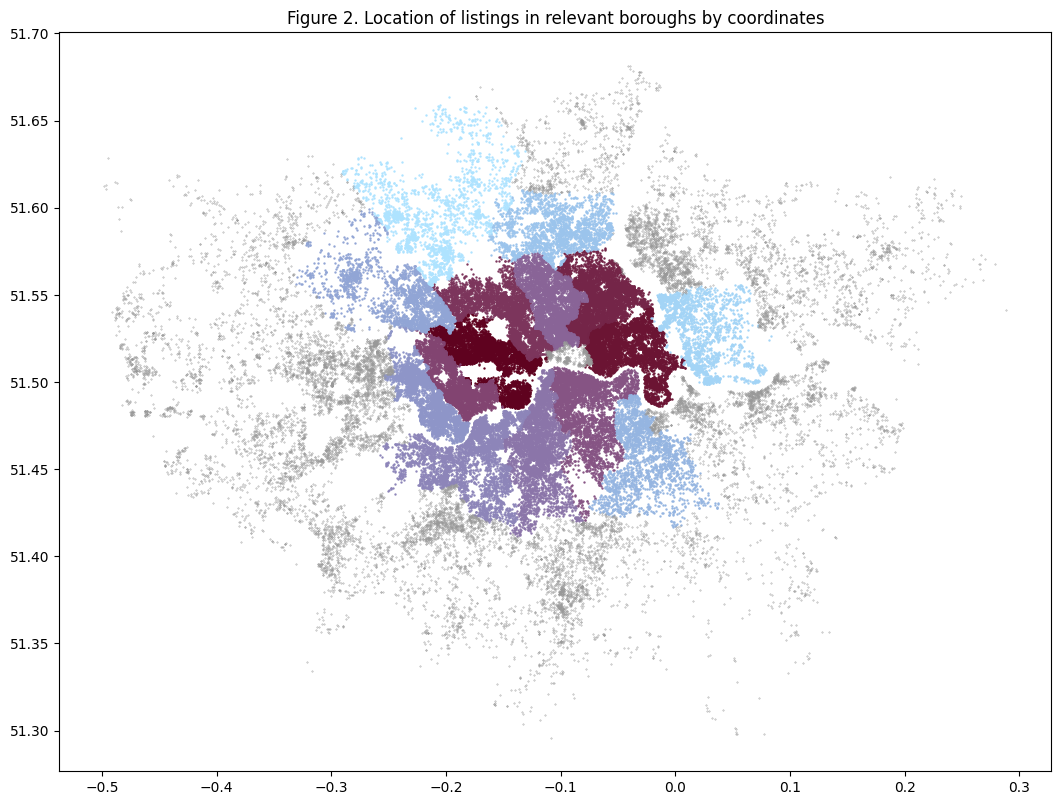

In [35]:
x_mtx_r = []                                                                                            #Vector for longitude coordinates for listings in each relevant neighbourhood
x_mtx_nr = []                                                                                           #Vector for longitude coordinates for listings in each non-relevant neighbourhood
y_mtx_r = []                                                                                            #Vector for latitude coordinates for listings in each relevant neighbourhood
y_mtx_nr = []                                                                                           #Vector for latitude coordinates for listings in each non-relevant neighbourhood
c_r = ['#5f021f','#6b1433','#742548','#7c355c','#824471','#865484','#896497','#8b75a9','#8d85b9',\
    '#8e95c8','#91a5d5','#95b5e1','#9bc4ec','#a3d4f6','#aee3ff']

for r in nh_rep:
    x_mtx_r.append(lsts_df.loc[lsts_df['neighbourhood_cleansed'] == r]['longitude'])
    y_mtx_r.append(lsts_df.loc[lsts_df['neighbourhood_cleansed'] == r]['latitude'])

for nr in nh_nrep:
    x_mtx_nr.append(lsts_df.loc[lsts_df['neighbourhood_cleansed'] == nr]['longitude'])
    y_mtx_nr.append(lsts_df.loc[lsts_df['neighbourhood_cleansed'] == nr]['latitude'])

fig = plt.figure()
w,h = fig.get_size_inches()
fig.set_size_inches(w*2,h*2)
plt.title("Figure 2. Location of listings in relevant boroughs by coordinates")

for i in range(len(x_mtx_r)):
    plt.scatter(x_mtx_r[i],y_mtx_r[i],s=0.5,color=c_r[i])

for j in range(len(x_mtx_nr)):
    plt.scatter(x_mtx_nr[j],y_mtx_nr[j],s=0.1,color='#999999')

plt.show()

Note how the numbers are greater (darker colour) in the most central neighbourhoods of the city. The listings in neighbourhoods that are considered "not relevant" are coloured in grey.

### 1.2 Prices
For the prices, we begin by representing the listings in a fixed number of bins. To do this, we start by converting the price data into operable numbers

In [36]:
lsts_df["price_conv"] = lsts_df["price"].str.replace('[$,]','',regex=True).astype(float)

Then, we define the number of bins and plot the frequency of listings that correspond to each bin. To avoid visualization errors, we first eliminate outliers by ignoring prices that outside of 1.5 times the interquartile range (the range between the 25th and 75th percentile)

[]

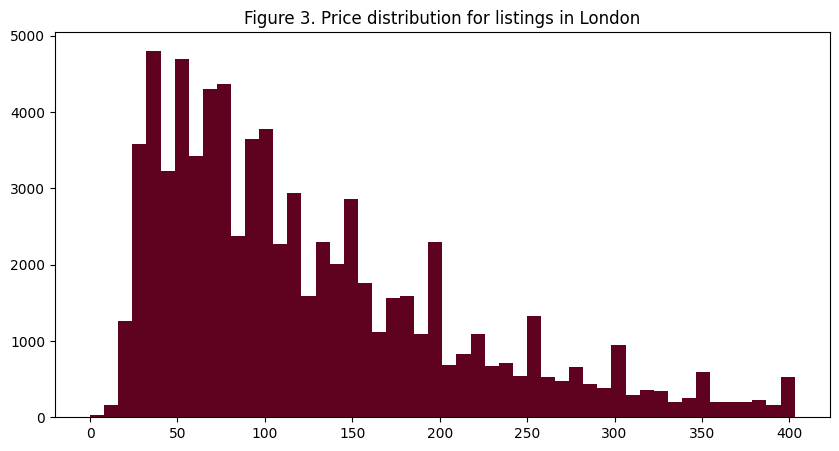

In [37]:
q1 = lsts_df["price_conv"].quantile(0.25)
q3 = lsts_df["price_conv"].quantile(0.75)
iqr = q3-q1

plt.figure(figsize=(10,5))
plt.hist(lsts_df.loc[lsts_df["price_conv"] <= (q3 + 1.5*iqr)]["price_conv"],bins=50,color='#5f021f')
plt.title("Figure 3. Price distribution for listings in London")
plt.plot()

Here, we see that the distribution is skewed towards values between $50 and $100 per night, which can be used as a reference for the potential pricing of a future listing.

We can also find relevant data for the prices (ignoring the outliers removed in the previous step) by looking at a box plot. 
- The vertical yellow line represents the median value. 
- The green triangle represents the mean.
- The vertical edges of the box correspond to the 25th percentile and 75th percentile, respectively.

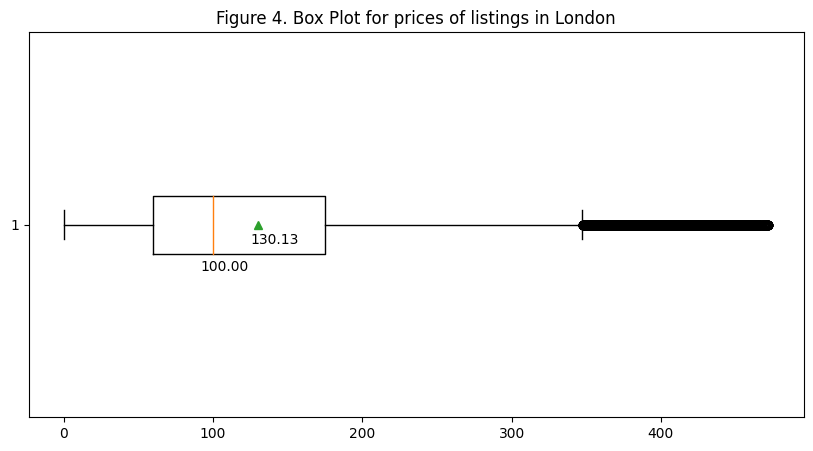

In [38]:
plt.figure(figsize=(10,5))
plt.boxplot(lsts_df.loc[lsts_df["price_conv"] <= (q3 + 2*iqr)]["price_conv"], showmeans=True, vert=False)

text_m = lsts_df.loc[lsts_df["price_conv"] <= (q3 + 2*iqr)]["price_conv"].mean()
text_md = lsts_df.loc[lsts_df["price_conv"] <= (q3 + 2*iqr)]["price_conv"].median()
text_m = '{:.2f}'.format(text_m)
text_md = '{:.2f}'.format(text_md)

plt.annotate(text_m,xy=(250,207),xycoords='figure pixels')
plt.annotate(text_md,xy=(200,180),xycoords='figure pixels')
plt.title("Figure 4. Box Plot for prices of listings in London")
plt.show()

Now it is clearer that the median lands exactly at $100, while the average is a bit higher at $130.13. This can provide a reference range to set the prices of new listings.

### 1.3 Property features
Now, we will take a look at how the listings in the city are distributed in terms of their type and size, defined as the maximum number of people that can be accommodated in the property. This will help in discovering any trends in composition of properties, which we can later compare to availability, prices, and bookings, to figure out the most sought-after features.

To get insight on the type of property that is mostly available in London, we display the property types as stacked bars, with colors representing the maximum number of people that can be accommodated per type of listing.

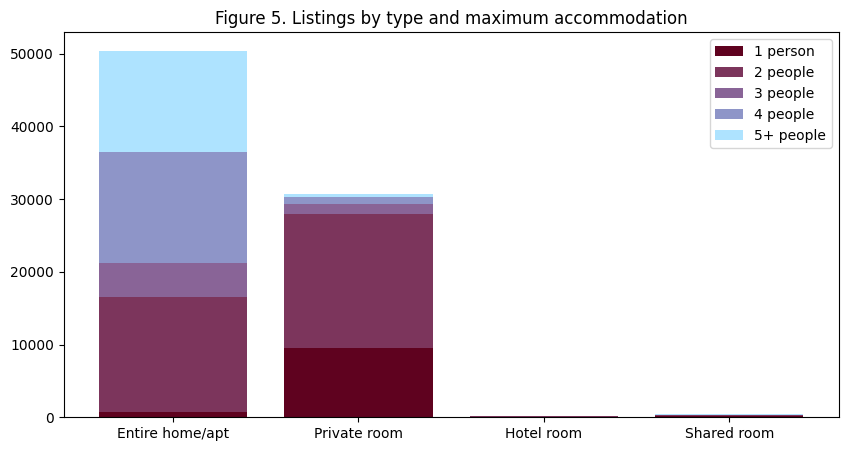

In [39]:
x = lsts_df["room_type"].unique()
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []

for rt in lsts_df["room_type"].unique():
    y1.append(len(lsts_df.loc[(lsts_df["room_type"]==rt) & (lsts_df["accommodates"]==1)]))
    y2.append(len(lsts_df.loc[(lsts_df["room_type"]==rt) & (lsts_df["accommodates"]==2)]))
    y3.append(len(lsts_df.loc[(lsts_df["room_type"]==rt) & (lsts_df["accommodates"]==3)]))
    y4.append(len(lsts_df.loc[(lsts_df["room_type"]==rt) & (lsts_df["accommodates"]==4)]))
    y5.append(len(lsts_df.loc[(lsts_df["room_type"]==rt) & (lsts_df["accommodates"]>=5)]))

plt.figure(figsize=(10,5))
plt.bar(x, y1, color="#5f021f")
plt.bar(x, y2, bottom=np.array(y1), color="#7c355c")
plt.bar(x, y3, bottom=np.array(y1)+np.array(y2), color="#896497")
plt.bar(x, y4, bottom=np.array(y1)+np.array(y2)+np.array(y3), color="#8e95c8")
plt.bar(x, y5, bottom=np.array(y1)+np.array(y2)+np.array(y3)+np.array(y4), color="#aee3ff")
plt.legend(["1 person","2 people","3 people","4 people","5+ people"])
plt.title("Figure 5. Listings by type and maximum accommodation")
plt.show()

According to this representation, the majority of properties are either entire homes, appartments, or private rooms, which accommodate 2 people.

### 1.4 Availability (Offer)
To get a sense of the offer of properties in certain areas, we will look at the availability numbers for the next 30, 60, 90 days.

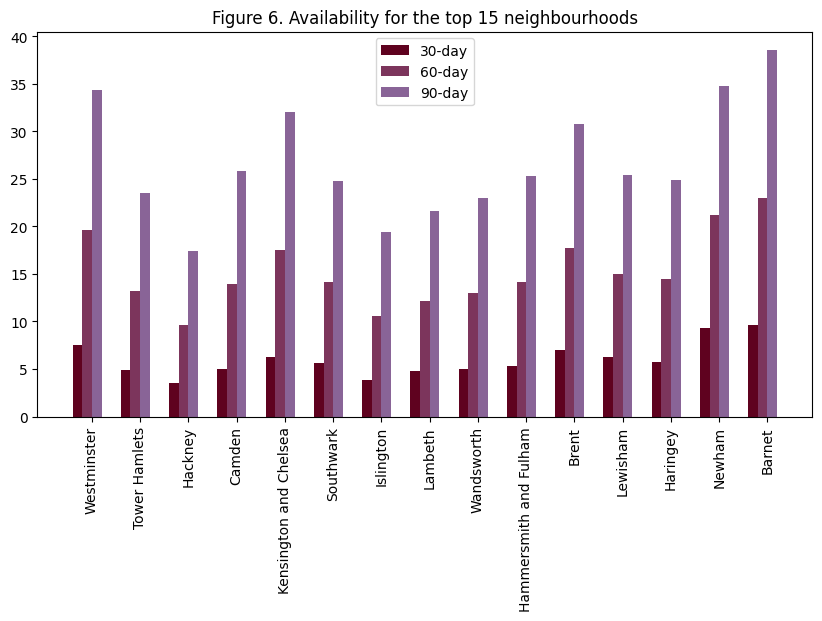

In [40]:
x_axis = np.arange(len(nh_rep))
y_av30d = []
y_av60d = []
y_av90d = []
y_nhrep = []

for n in nh_rep:
    y_av30d.append(lsts_df.loc[lsts_df['neighbourhood_cleansed']==n]['availability_30'].mean())
    y_av60d.append(lsts_df.loc[lsts_df['neighbourhood_cleansed']==n]['availability_60'].mean())
    y_av90d.append(lsts_df.loc[lsts_df['neighbourhood_cleansed']==n]['availability_90'].mean())
    y_nhrep.append(len(lsts_df[lsts_df['neighbourhood_cleansed']==n]))

plt.figure(figsize=(10,5))
plt.xticks(x_axis,nh_rep)
plt.xticks(rotation=90)

plt.bar(x_axis - 0.3,y_av30d,0.2,color='#5f021f',label = '30-day')
plt.bar(x_axis - 0.1,y_av60d,0.2,color='#7c355c', label = '60-day')
plt.bar(x_axis + 0.1,y_av90d,0.2,color='#896497', label = '90-day')
plt.legend()

plt.title("Figure 6. Availability for the top 15 neighbourhoods")
plt.show()

Here, the size of the bar represent the number of available days for properties in the corresponding neighbourhood, sorted by total listings in each neighbourhood. Note how this metric does not follow a linear relation to the total listings. We will explore the relationship and its meaning in a later section.

### 1.5 Number of Reviews - Demand
Here, we will take a quick look at the number of reviews, since they give a general idea of the number of times each property has been reserved. We will sort them by the month in which the review was left, in order to pinpoint any particular season of higher demand.

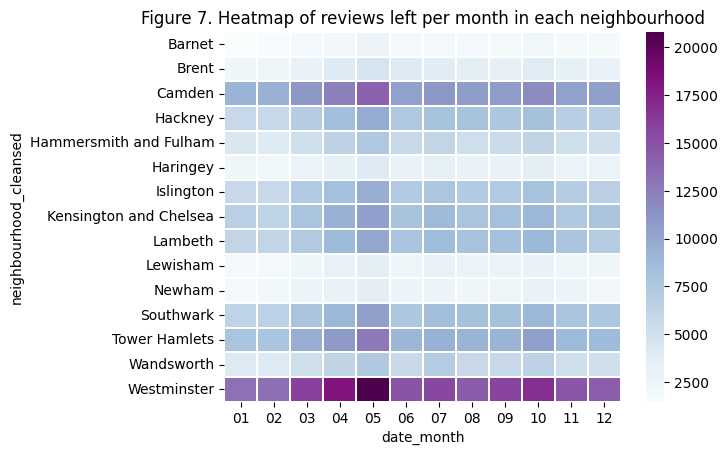

In [41]:
lsts_id = lsts_df.rename(columns={'id':'listing_id'})
lsts_id = lsts_id[['listing_id','neighbourhood_cleansed']]

revs_nh = revs_df.merge(lsts_id,how="left")
revs_nh[['date_year','date_month','date_day']] = revs_nh.date.str.split("-",expand=True)
revs_gb = revs_nh.groupby(['neighbourhood_cleansed','date_month']).size().reset_index().rename(columns={0:'count'})

revs_gbf = revs_gb[revs_gb['neighbourhood_cleansed'].isin(nh_rep)]
revs_hm = revs_gbf.pivot(index='neighbourhood_cleansed',columns='date_month',values='count')

sb.heatmap(revs_hm,cmap='BuPu',linewidth=0.3)
plt.title("Figure 7. Heatmap of reviews left per month in each neighbourhood")
plt.show()

From this heatmap we can see that, accross all neighbourhoods, there are more the months of April, May, and October

### 1.6 Review scores
Now let's look at the review scores for properties in each of the most representative neighbourhoods to get a broad sense of how each zone is perceived by guests.

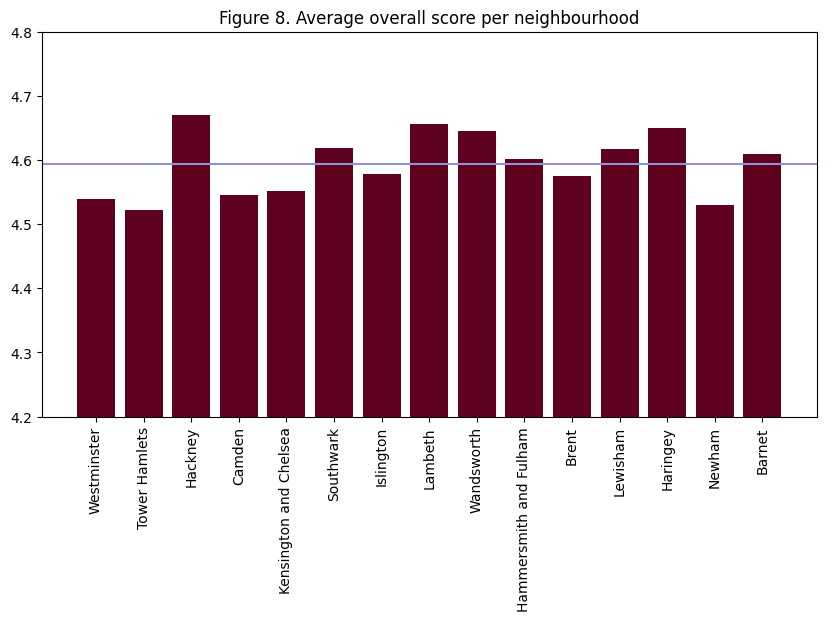

In [42]:
lsts_sr = lsts_df.groupby('neighbourhood_cleansed')['review_scores_rating'].mean()
lsts_srr = lsts_sr.filter(items=nh_rep)

plt.figure(figsize=(10,5))
plt.bar(nh_rep,lsts_srr,color='#5f021f')
plt.ylim(4.2,4.8)
plt.xticks(rotation=90)
plt.axhline(lsts_srr.mean(),color='#8e95c8')
plt.title("Figure 8. Average overall score per neighbourhood")
plt.show()

Here we can see that, despite the average rating of the most representative neighbourhoods is quite high, some of them perform above the average (horizontal line).

### 1.7 Amenity score
we look for the most popular amenities within the listings. Then, we use the list of amenities of each listing to give it a score, based on how many of the 30 top amenities it includes. Then, we show the average "amenity score" for each of the most representative neighbourhoods.

First, we convert the "amenities" list in the original dataset to a friendlier format:

In [43]:
lsts_df['amenities'] = lsts_df['amenities'].str.strip('[]').str.split(", ")

Then, we add the new 'amenity score' to each of the listings:

In [44]:
amt_flt = pd.Series([x for item in lsts_df.amenities for x in item]).value_counts()[0:29]
lsts_df['amenity score'] = 0

for l in range(len(lsts_df)):
    lst_count = 0
    for a in lsts_df['amenities'][l]:
        if a in amt_flt:
            lst_count= lst_count+1
    lsts_df.at[l,'amenity score'] = lst_count

Finally, we plot the average amenity score for each of the top neighbourhoods

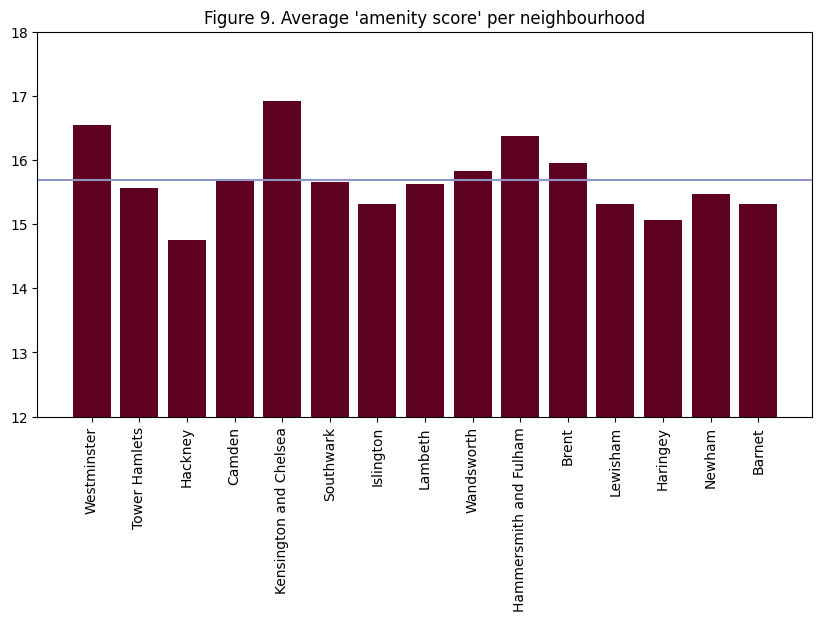

In [45]:
lsts_asc = lsts_df.groupby('neighbourhood_cleansed')['amenity score'].mean()
lsts_asr = lsts_asc.filter(items=nh_rep)

plt.figure(figsize=(10,5))
plt.bar(nh_rep,lsts_asr,color='#5f021f')
plt.ylim(12,18)
plt.xticks(rotation=90)
plt.axhline(lsts_asr.mean(),color='#8e95c8')
plt.title("Figure 9. Average 'amenity score' per neighbourhood")
plt.show()

This gives us some information regarding which neighbourhoods have listings with better amenities, while also helping in identifying neighbourhoods with properties that can be improved with small investments in amenities.